# Practical-Lab-2

## Add the required imports

In [250]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


# Part 1

## 1. Get the data

In [251]:
# Load the dataset
diabetes_dataset = load_diabetes(as_frame=True)
df = diabetes_dataset.frame

# Show the first 10 rows
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In the above step , we load the data and then, we display the first 10 rows.

## 2.  Frame the Problem. Notice that the dependent variable of diabetes progression, namely "disease progression one year after baseline".

Goal: Predict "disease progression one year after baseline" (target variable y) based on patient features (X).

## 3.  EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, scatter plots histograms, a correlation matrix, and concise and relevant insights (4 point).


 The summary statistics is:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4

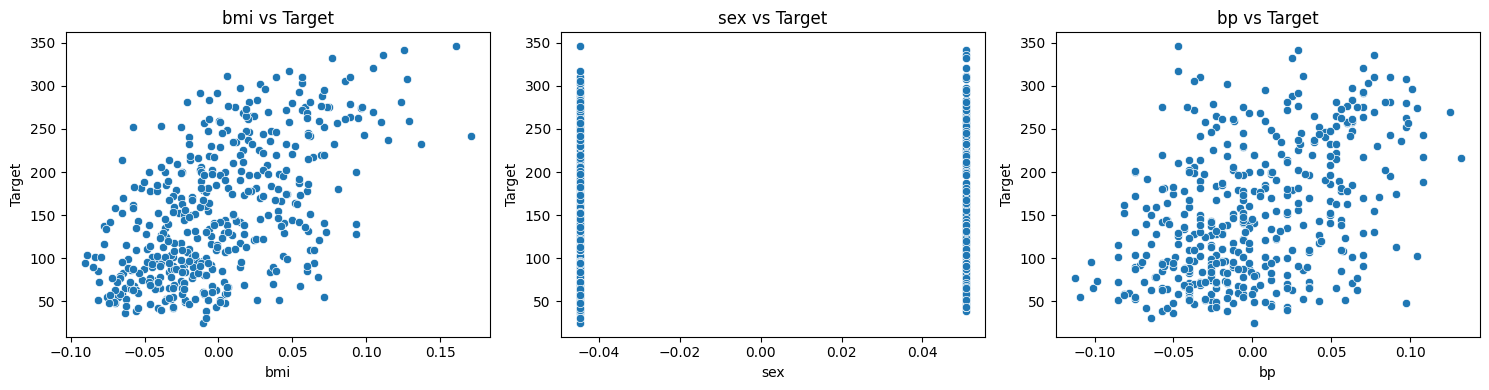

In [252]:
# Summary statistics
print("\n The summary statistics is:")
print(df.describe())

# Correlation matrix
print("\n The correlation matrix is:")
correlation_matrix = df.corr()
print(df.corr())

# Scatter plots
print("\n The scatter plots are: ")
# selected features
selected_features = ['bmi', 'sex', 'bp']
# create a plot with width = 15 and height = 4
plt.figure(figsize=(15, 4))
# loop through each selected feature and its index
for i, feature in enumerate(selected_features):
    # create a plot with 1 row, 3 columns
    plt.subplot(1, 3, i + 1)
    # create a scatter plots for target vs feature
    sns.scatterplot(data=df, x=feature, y='target')
    # set the title for each plot
    plt.title(f"{feature} vs Target")
    # set the x and the y axis
    plt.xlabel(feature)
    plt.ylabel("Target")
# Adjust spacing such the plots don't overlap
plt.tight_layout()
# Display all the plots
plt.show()


## Histogram


 The histogram is: 


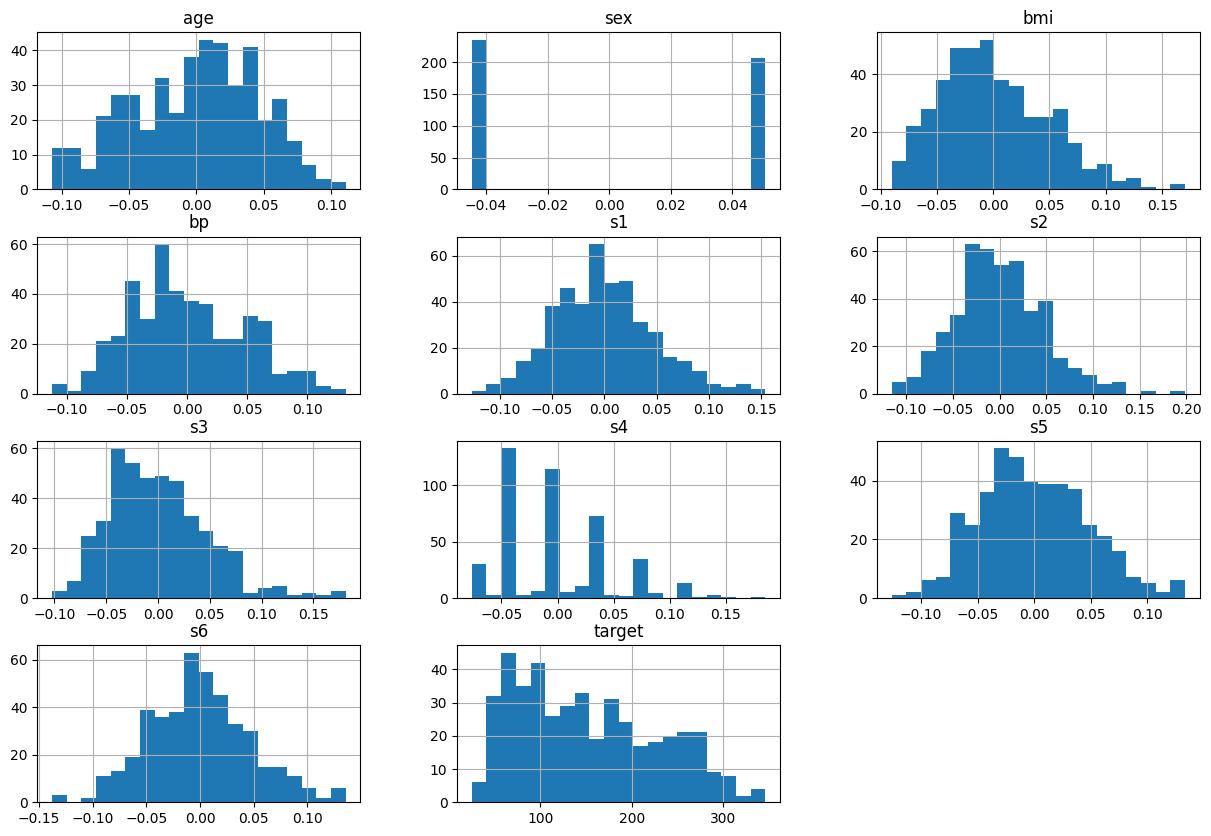

In [253]:
print("\n The histogram is: ")
# histogram where width=15 and height = 10
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Heat Map


 The correlation matrix is


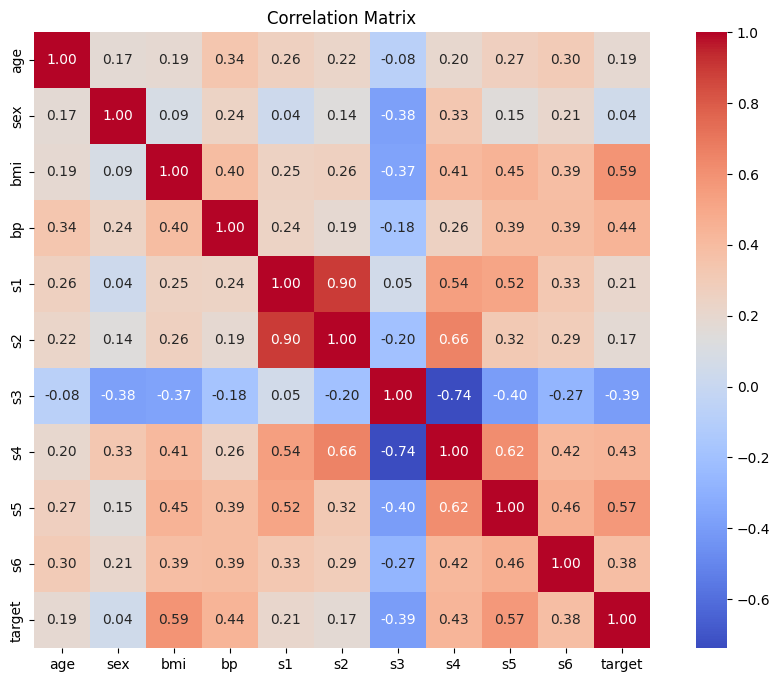

In [254]:
# create a plot where width is 12 and height is 8
print("\n The correlation matrix is")
# width = 12, height = 8
plt.figure(figsize=(12, 8))
# create the heat map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
# correlation matrix
plt.title("Correlation Matrix")
# display the heatmap
plt.show()

# Insights based on EDA plots

The histograms and scatter plots provide a visual representation of the distribution and relationships of variables such as age, sex, bmi, bp, s1 - s6, and target and the correlation matrix offers numerical insights into the relationships between these variables. Here are some key insights:

1. **Histograms:**
   - **Age, bmi, bp, s1-s6, target:** These variables show varying degrees of skewness and spread. For instance, age and bmi have relatively broad distributions, while sex and s4 appear more concentrated.
   - **Sex:** Displays a narrow distribution, suggesting it is likely a binary or categorical variable like 0 and 1 for male/female.
   - **Target:** Shows a right-skewed distribution, indicating that higher values are less frequent.

2. **Correlation Insights (Correlation Matrix):**
   - **Strong Positive Correlations:** Variables s1 and s2 (0.90), s4 and s5 (0.74), and s5 and s6 (0.62) show strong positive correlations, suggesting they may be measuring related aspects.
   - **Moderate Positive Correlations:** bmi and target (0.59), s3 and s4 (-0.74), and age with bmi (0.34) indicate moderate relationships, where an increase in one variable tends to be associated with an increase in the other.
   - **Negative Correlations:** s3 shows negative correlations with sex (-0.38), bmi (-0.37), and s4 (-0.74), indicating an inverse relationship.
   - **Weak Correlations:** Sex with most variables (e.g., 0.04 with target) and s3 with s1 (0.05) suggest little to no linear relationship.

3. **Scatter Plot Insights:**
   - **bmi vs Target:** Shows a broad scatter with some clustering, suggesting a potential non-linear relationship.
   - **sex vs Target:** Displays vertical bands, consistent with sex being a categorical variable, with little variation in target across sex values.
   - **bp vs Target:** Similar to bmi vs target, with a scattered pattern indicating a possible weak to moderate relationship.

Overall, the data suggests that s1-s6 might be related to each other and potentially to the target variable, while sex has limited predictive power for the target. Variables like bmi and bp may have some influence on the target, warranting further investigation.

# 4. Data Cleaning

In [255]:
# Check for missing values
print("\n Checking for the missing values")
print(df.isnull().sum())

# Check for duplicate values
print("\nChecking for the duplicated values")
print(df.duplicated().sum())


 Checking for the missing values
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Checking for the duplicated values
0


There are no missing values so there is no obvious outliers  or data quality issues were found. All features are numerical and ready for modelling.

# 5. Split the dataset to a train (75%) and validation set (10%), and test set (15%).

We split into 75% training dataset, 10% of validation dataset and 15% of test set

In [256]:
# Separate features and target
X = df.drop(columns='target')
y = df['target']

# Train (75%), validation (10%), test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10/0.85, random_state=42)

print(f'The Training : {X_train.shape[0]} samples')
print(f'The Validation: {X_val.shape[0]} samples')
print(f'The Test: {X_test.shape[0]} samples')

The Training : 330 samples
The Validation: 45 samples
The Test: 67 samples


# Part 2 

# 6. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models)

/Users/manumathew/Developer/appliedAIML/CSCN8010/Practical-Lab-2-CSCN8010-8990691/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/manumathew/Developer/appliedAIML/CSCN8010/Practical-Lab-2-CSCN8010-8990691/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/manumathew/Developer/appliedAIML/CSCN8010/Practical-Lab-2-CSCN8010-8990691/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/manumathew/Developer/appliedAIML/CSCN8010/Practical-Lab-2-CSCN8010-8990691/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/manumathew/Developer/appliedAIML

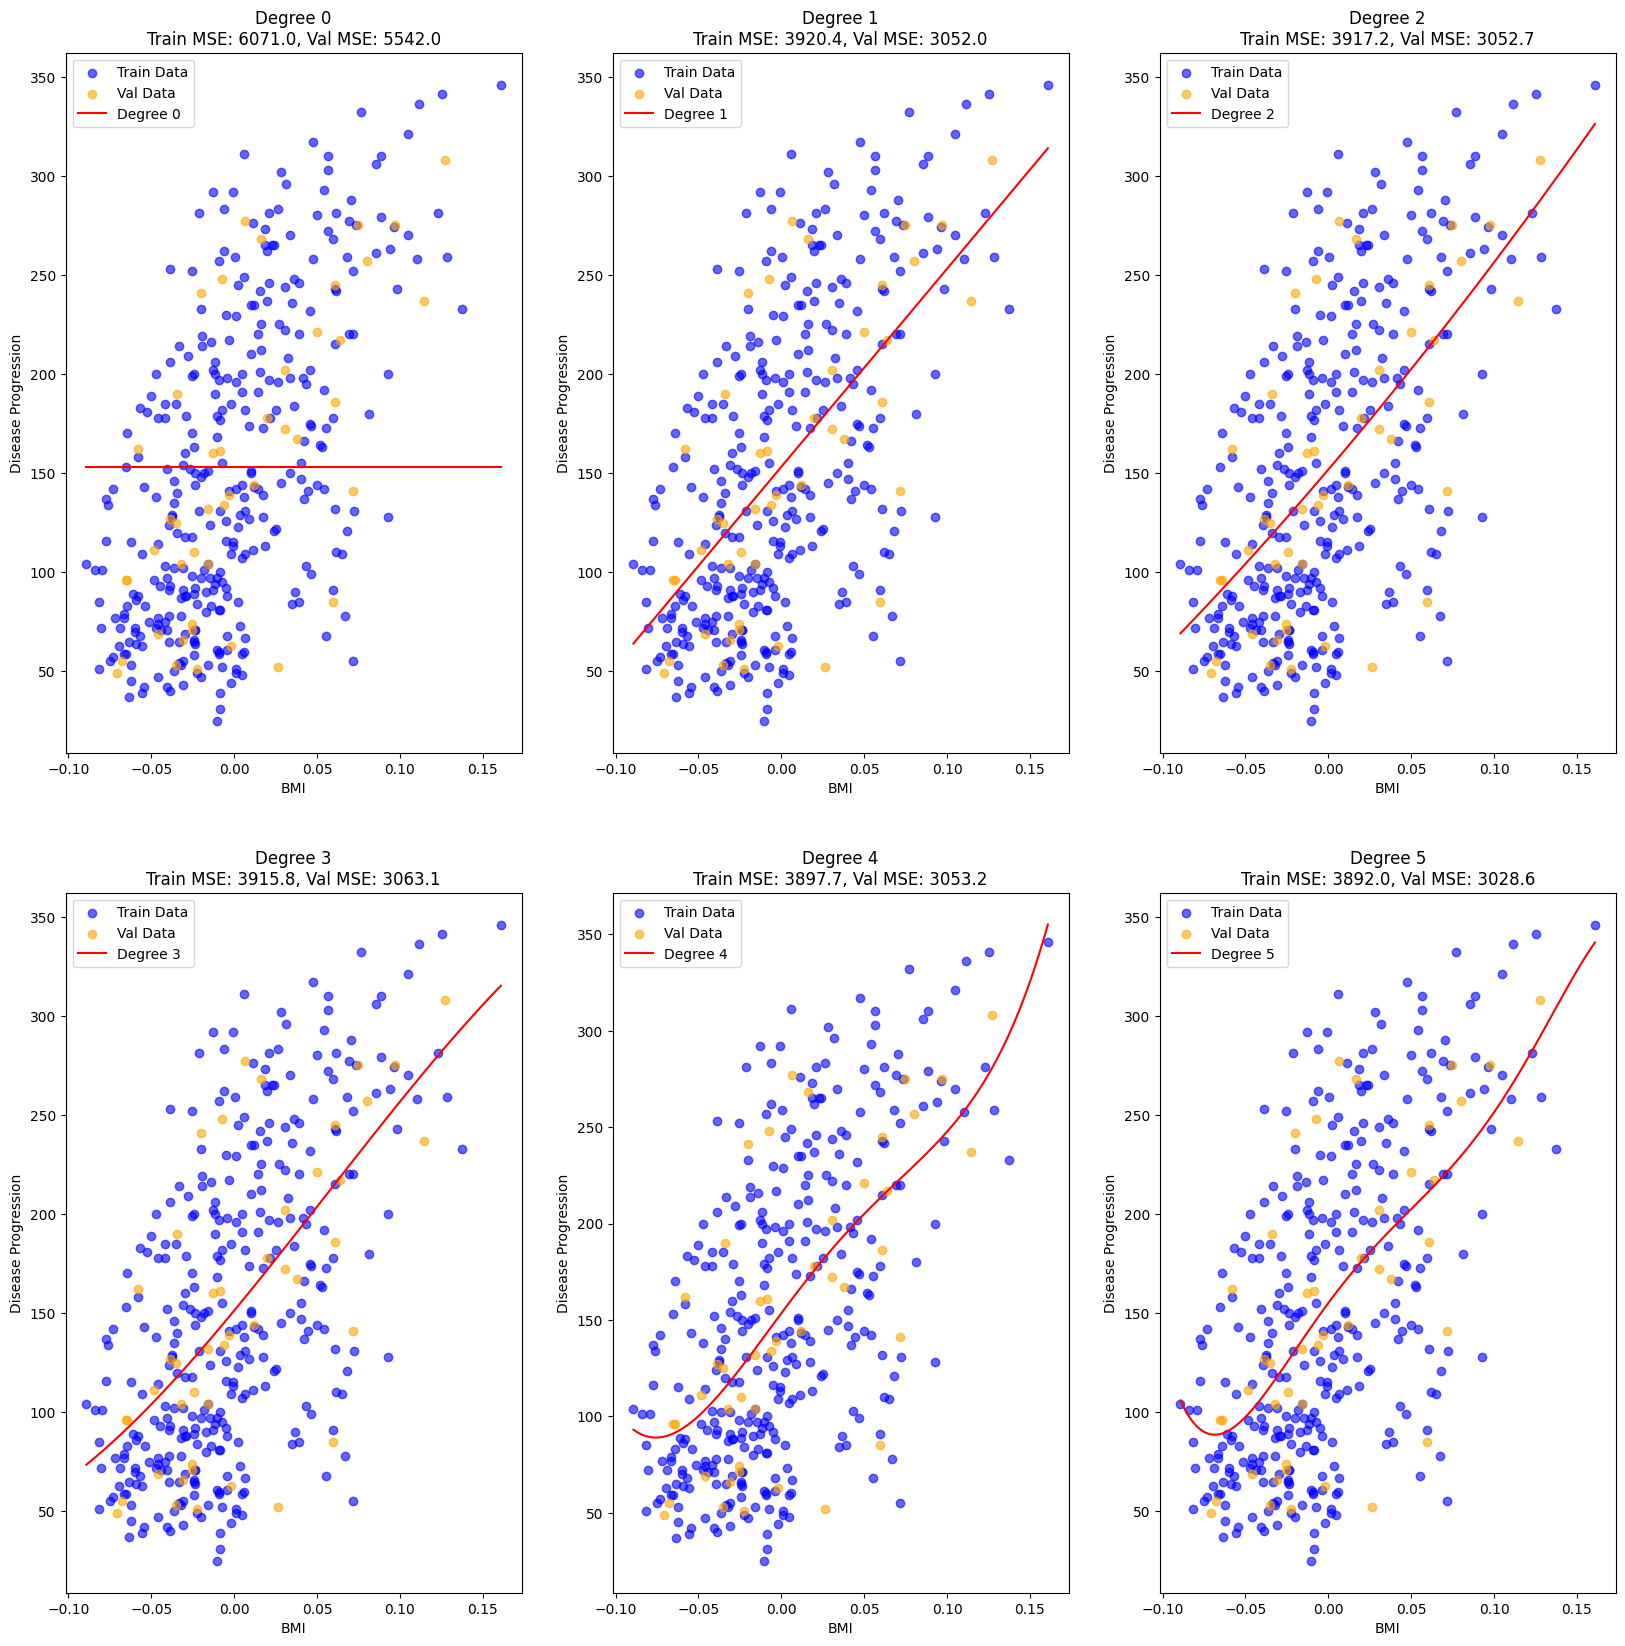

In [257]:
# Selecting only the BMI feature for training, validation and test dataser
X_train_bmi = X_train[["bmi"]].values
X_val_bmi = X_val[["bmi"]].values
X_test_bmi = X_test[["bmi"]].values
y_train_bmi = y_train.values
y_val_bmi = y_val.values

# Initialize list to store results and errors
results = []
degrees = range(6)
t_err = []
v_err = []
results = []

#create a large figure to plot the subplots for each degree
plt.figure(figsize=(20, 20))

# Loop over different polynomial degrees
for degree in (degrees):
     # Generate polynomial features of current degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)
    # Fit Linear Regression model on transformed training data  
    model = LinearRegression()  
    model.fit(X_train_poly, y_train_bmi)  

    # Predict on both training and validation sets
    y_train_pred = model.predict(X_train_poly)  
    y_val_pred = model.predict(X_val_poly)  

    # Plot training and validation data and the model fit
    X_plot = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)  
    X_plot_poly = poly.transform(X_plot)  
    y_plot = model.predict(X_plot_poly)  

    plt.subplot(2, 3, degree + 1)  
    plt.scatter(X_train_bmi, y_train_bmi, alpha=0.6, label="Train Data", color="blue")  
    plt.scatter(X_val_bmi, y_val_bmi, alpha=0.6, label="Val Data", color="orange")  
    plt.plot(X_plot, y_plot, color="red", label=f"Degree {degree}")  
    plt.title(f"Degree {degree}\nTrain MSE: {mean_squared_error(y_train_bmi, y_train_pred):.1f}, Val MSE: {mean_squared_error(y_val_bmi, y_val_pred):.1f}")  
    plt.xlabel("BMI")  
    plt.ylabel("Disease Progression")  
    plt.legend()  

    # Calculate evaluation metrics
    r2_train = r2_score(y_train_bmi, y_train_pred)  
    mae_train = mean_absolute_error(y_train_bmi, y_train_pred)  
    mape_train = np.mean(np.abs((y_train_bmi - y_train_pred) / y_train_bmi)) * 100  

    r2_val = r2_score(y_val_bmi, y_val_pred)  
    mae_val = mean_absolute_error(y_val_bmi, y_val_pred)  
    mape_val = np.mean(np.abs((y_val_bmi - y_val_pred) / y_val_bmi)) * 100  

    # Store results in a list of dictionaries for analysis 
    results.append({  
        'Degree': degree,  
        'R2Train': round(r2_train, 4),  
        'Train MAE': round(mae_train, 2),  
        'Train MAPE': round(mape_train, 2),  
        'R2Val': round(r2_val, 4),  
        'MAEVal': round(mae_val, 2),  
        'MAPEVal': round(mape_val, 2)  
    })


# 7. Models comparison using the training and validation data.

In [258]:
print("The table summarizing the train validation results:")
results_df = pd.DataFrame(results)
print(results_df)

The table summarizing the train validation results:
   Degree  R2Train  Train MAE  Train MAPE   R2Val  MAEVal  MAPEVal
0       0   0.0000      66.55       63.35 -0.0000   63.45    58.79
1       1   0.3542      52.28       48.46  0.4493   42.00    40.44
2       2   0.3548      52.27       48.45  0.4492   41.76    40.31
3       3   0.3550      52.22       48.36  0.4473   41.74    40.26
4       4   0.3580      51.94       47.96  0.4491   41.95    40.24
5       5   0.3589      51.81       47.83  0.4535   42.08    40.34


# 8. Identify the best model based on the table above.

In [259]:
# find the best-performing polynomial degree (good fit + low error)
best_deg = results_df.sort_values(by=['R2Val', 'MAEVal'], ascending=[False,True]).iloc[0]

# Extract the best degree value from the selected row and convert it to an integer
best_degree_value = int(best_deg['Degree'])

# Print the best model's polynomial degree
print(f"Best model: Degree {best_degree_value}")

Best model: Degree 5


The degree 5 looks good because of the highest R2 Val and lowest MAPE Val

# 9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE).

In [260]:
# Create polynomial features using the best degree found from validation
poly_best = PolynomialFeatures(degree=best_degree_value)

# Transform the training and test BMI data using the fitted polynomial transformer
X_train_poly = poly_best.fit_transform(X_train_bmi)
X_test_poly = poly_best.transform(X_test_bmi)

# Initialize and fit the linear regression model on the polynomial-transformed training data
model_best = LinearRegression()
model_best.fit(X_train_poly, y_train)

# Predict disease progression on the test set using the trained model
y_test_pred = model_best.predict(X_test_poly)

# Calculate test set evaluation metrics
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the test metrics
print(f"The R2 Test: {r2_test:.3f}, the MAE Test: {mae_test:.2f} and the MAPE Test: {mape_test:.2f}%.")

The R2 Test: 0.197, the MAE Test: 54.55 and the MAPE Test: 47.88%.


# 10. Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them 

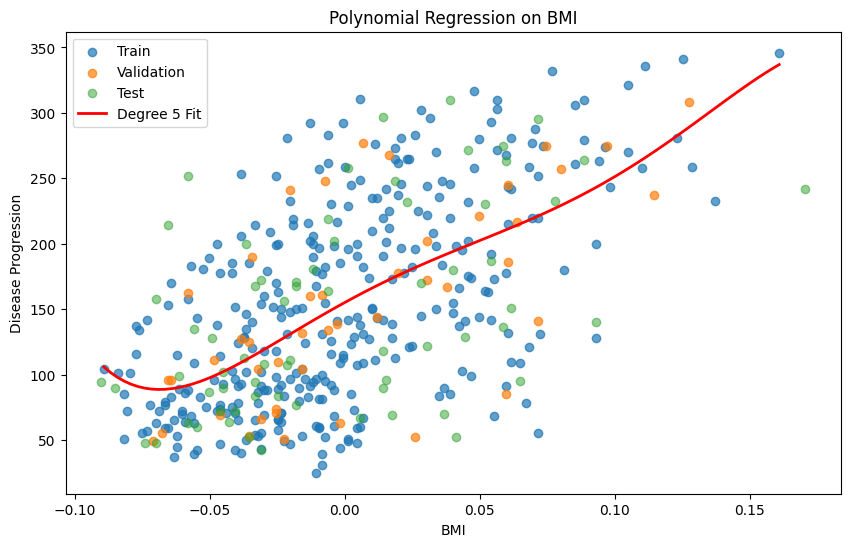

In [261]:
# Create a new figure for plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train, alpha=0.7, label='Train') # Training dataset
plt.scatter(X_val_bmi, y_val, alpha=0.7, label='Validation') # Validation dataset
plt.scatter(X_test_bmi, y_test, alpha=0.5, label='Test') # Testing dataset
# Generate a smooth range of BMI values for plotting the polynomial curve
bmi_range = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)
# Transform the BMI range using the best polynomial degree
bmi_poly = poly_best.transform(bmi_range)
# Predict disease progression using the trained model on the transformed BMI range
y_fit = model_best.predict(bmi_poly)
# Plot the polynomial regression line (line of best fit)
plt.plot(bmi_range, y_fit, color='red', linewidth=2, label=f'Degree {best_degree_value} Fit')
# Add axis labels, legend, and title
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.title('Polynomial Regression on BMI')
# Display the plot
plt.show()

# 11. Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient)

In [262]:
# Create polynomial features using the best degree for only the 'bmi' feature
poly_best = PolynomialFeatures(degree=best_degree_value)

# Fit and transform the training BMI data into polynomial features
X_train_poly = poly_best.fit_transform(X_train[['bmi']])

# Initialize and train the Linear Regression model on the transformed data
model_best = LinearRegression()
model_best.fit(X_train_poly, y_train)

# Get the model's intercept (constant term in the equation)
intercept = model_best.intercept_

# Get the coefficients for each polynomial term
coefficients = model_best.coef_

# Print equation
feature_names = poly_best.get_feature_names_out(['bmi'])

# Print the intercept
print(f"The Intercept is: {intercept:.2f}")

# Print the coefficient for each polynomial term along with its feature name
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.2f}")

The Intercept is: 155.08
1: 0.00
bmi: 1131.59
bmi^2: -3946.02
bmi^3: -26110.86
bmi^4: 768725.87
bmi^5: -2823251.97


### Equation
$$
\hat{y} = 155.08 + 1131.59 \cdot x - 3946.02 \cdot x^2 - 26110.86 \cdot x^3 + 768725.87 \cdot x^4 - 2823251.97 \cdot x^5
$$


# 12. Predict for Custom BMI Value (-0.05)

In [263]:
# Define a sample BMI value (as a 2D array to match input shape)
bmi_sample_value =np.array([[-0.05]])
# Print the sample BMI value
print(f"The Sample BMI value: {bmi_sample_value[0][0]}")
# Create a DataFrame using the sample BMI value
# The value needs to be unwrapped from the outer list
bmi_input_df = pd.DataFrame({'bmi': [bmi_sample_value]})
# Transform the sample BMI value using the fitted PolynomialFeatures transformer
custom_bmi_poly = poly_best.transform(bmi_input_df)
# Predict disease progression using the trained model
predicted_progression = model_best.predict(custom_bmi_poly)
# Print the predicted result
print(f"The Predicted result is={bmi_sample_value[0][0]} is {predicted_progression[0]:.2f}")

The Sample BMI value: -0.05
The Predicted result is=-0.05 is 97.59


# 13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`

In [264]:
features = poly_best.get_feature_names_out(['bmi'])
n_features = len(features)

print(f"The number of Trainable Parameters (including intercept): {n_features}")
print("The Polynomial Features:", feature_names)

The number of Trainable Parameters (including intercept): 6
The Polynomial Features: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']
